In [34]:
from src.Prep import *
from src.Model import *
import warnings
warnings.filterwarnings('ignore')

In [30]:
from pytictoc import TicToc
t = TicToc() #create instance of class

In [13]:
%load_ext autoreload
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [191]:
%autoreload

In [5]:
df = Prep(files).compile()

------------------------------------PREP------------------------------------
 1 of 11 |    Reading in data 
         |    Filtering to 4 features:
         |       Date, System Size, Total Cost, Customer Segment 
         |    Changing -9999 values to null
 2 of 11 |    Cleaning up column names
 3 of 11 |    Refining to only RES Customer Segment
 4 of 11 |    Sorting values by installation_date
         |    Assigning installation_date as index
 5 of 11 |    Replacing all null values with median values from same year
 6 of 11 |    Adusting prices for inflation
 7 of 11 |    Creating target variable: cost_per_watt
 8 of 11 |    Resampling data into weekly medians
         |    Cropping dataframe to keep only continuous non-null data
 9 of 11 |    Testing for stationarity
         |       ADF P-value: 0.9588 
         |       Time Series is not stationary.   
         |       Fail to reject ADF H0
10 of 11 |    Creating differenced data to achieve stationarity
11 of 11 |    Testing for s

Auto or Manual?:


 auto


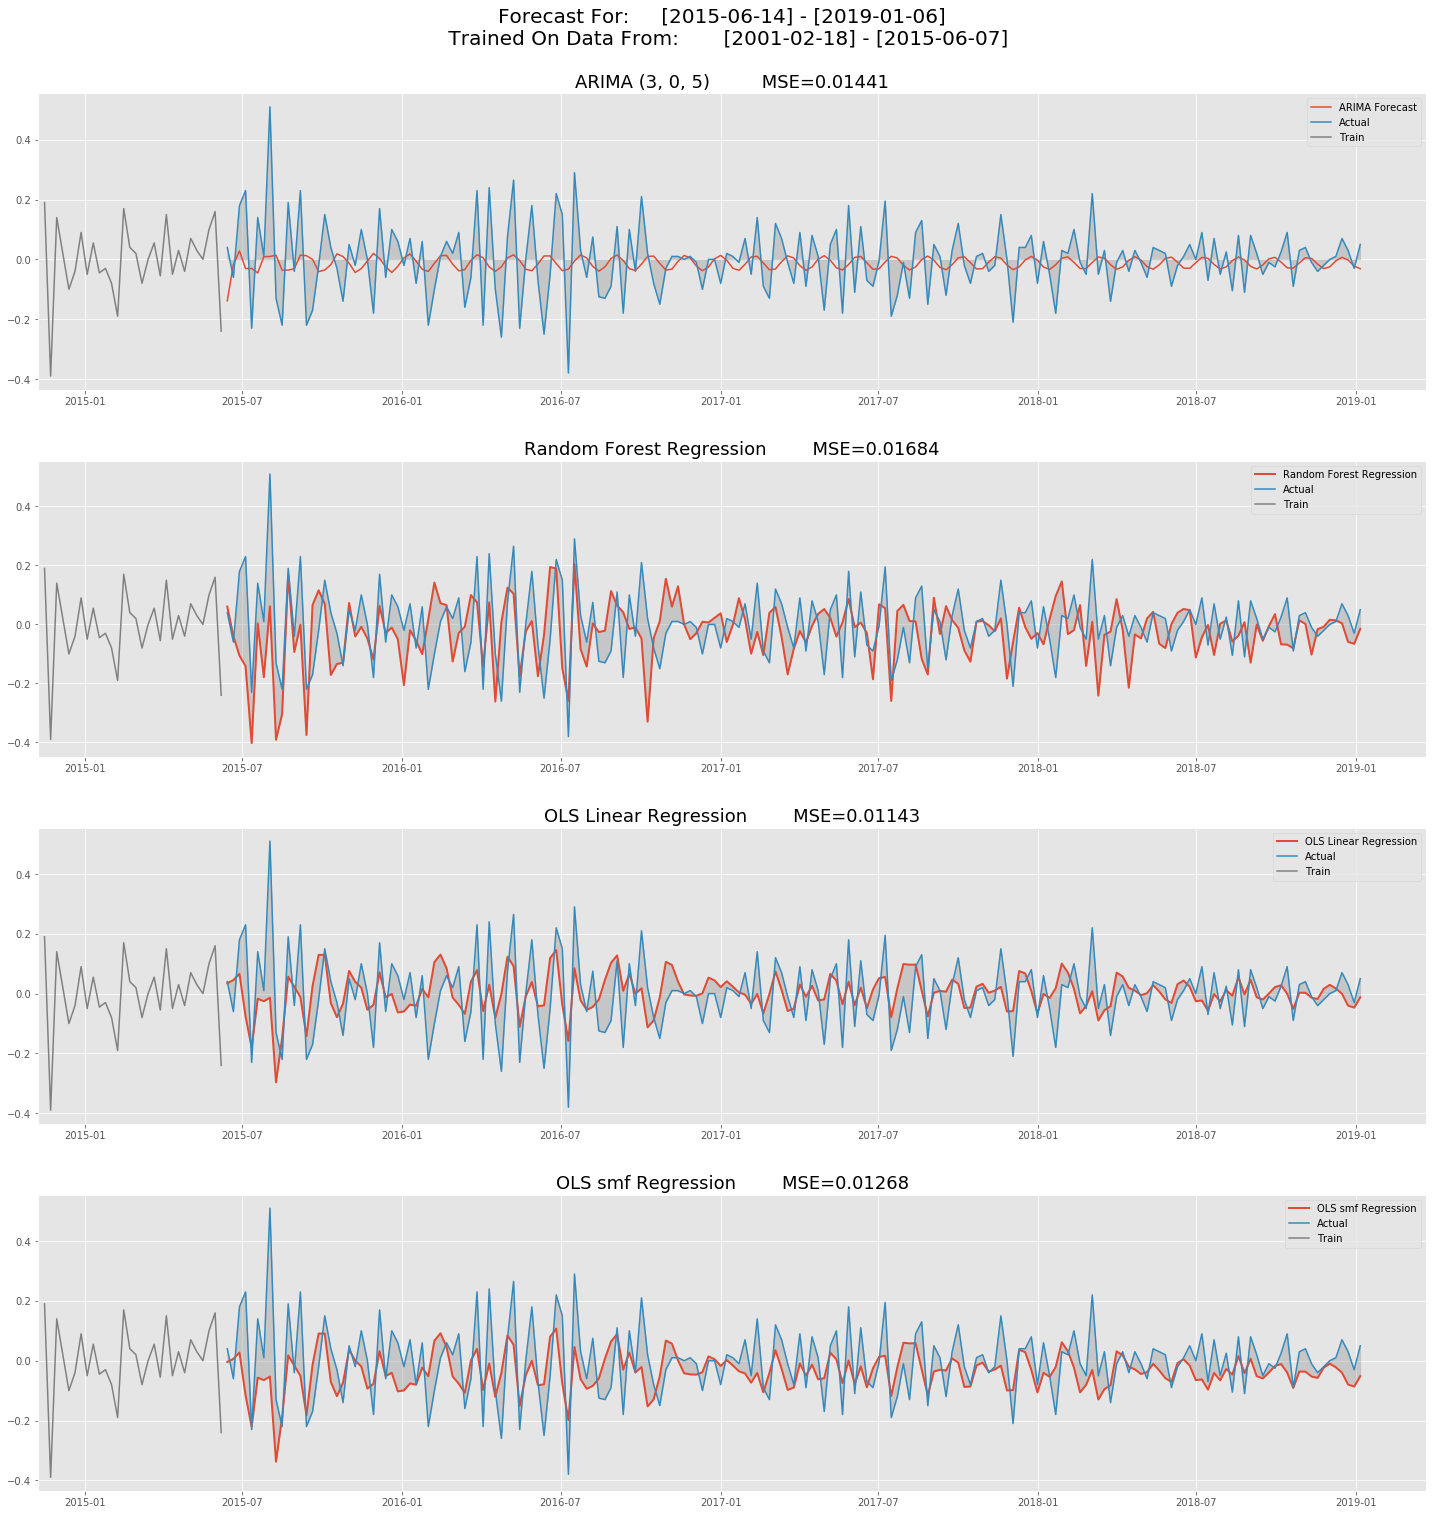

In [141]:
Models(find_order=True).show_models(df)

Would you like to use a specific order? (Y/N)


 N


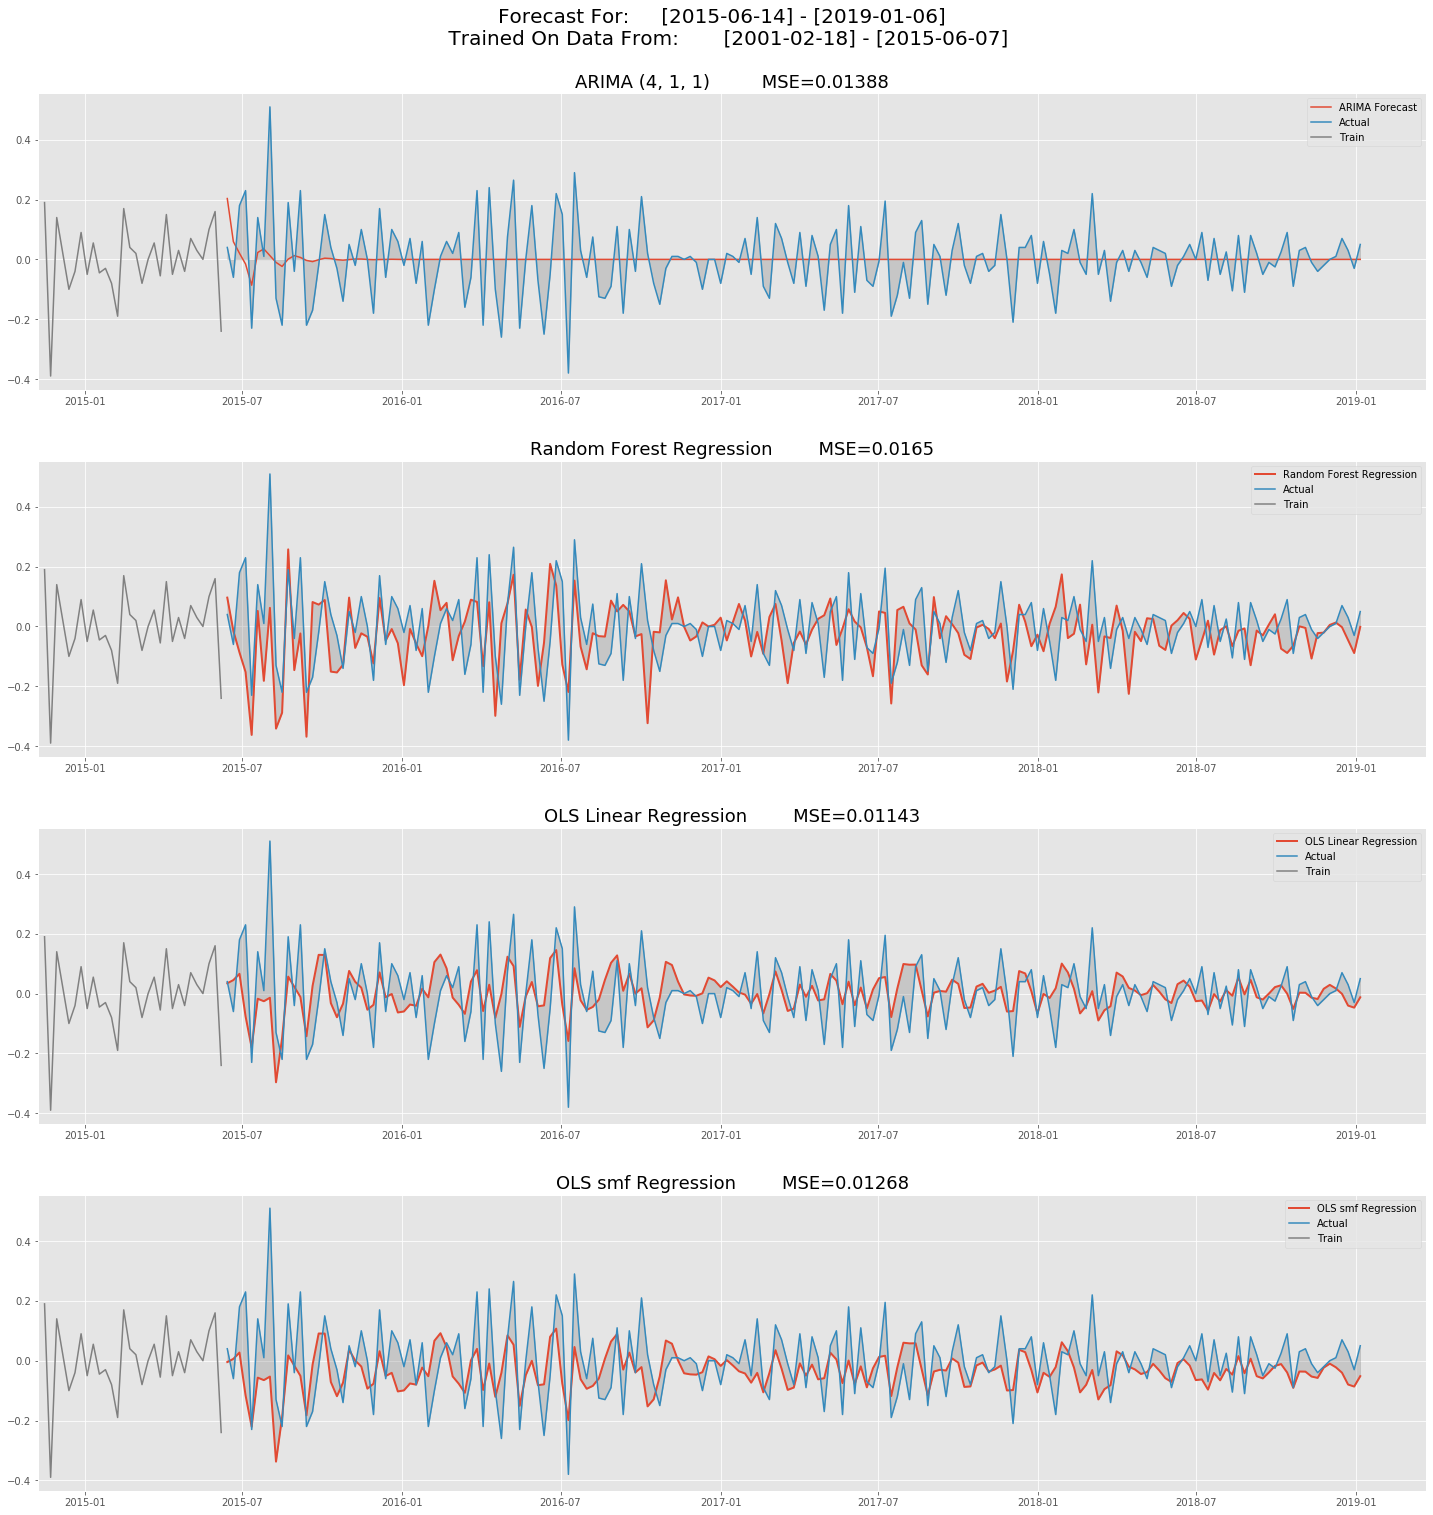

In [142]:
Models(find_order=False).show_models(df)

Would you like to use a specific order? (Y/N)


 Y
p: 4
d: 0
q: 0


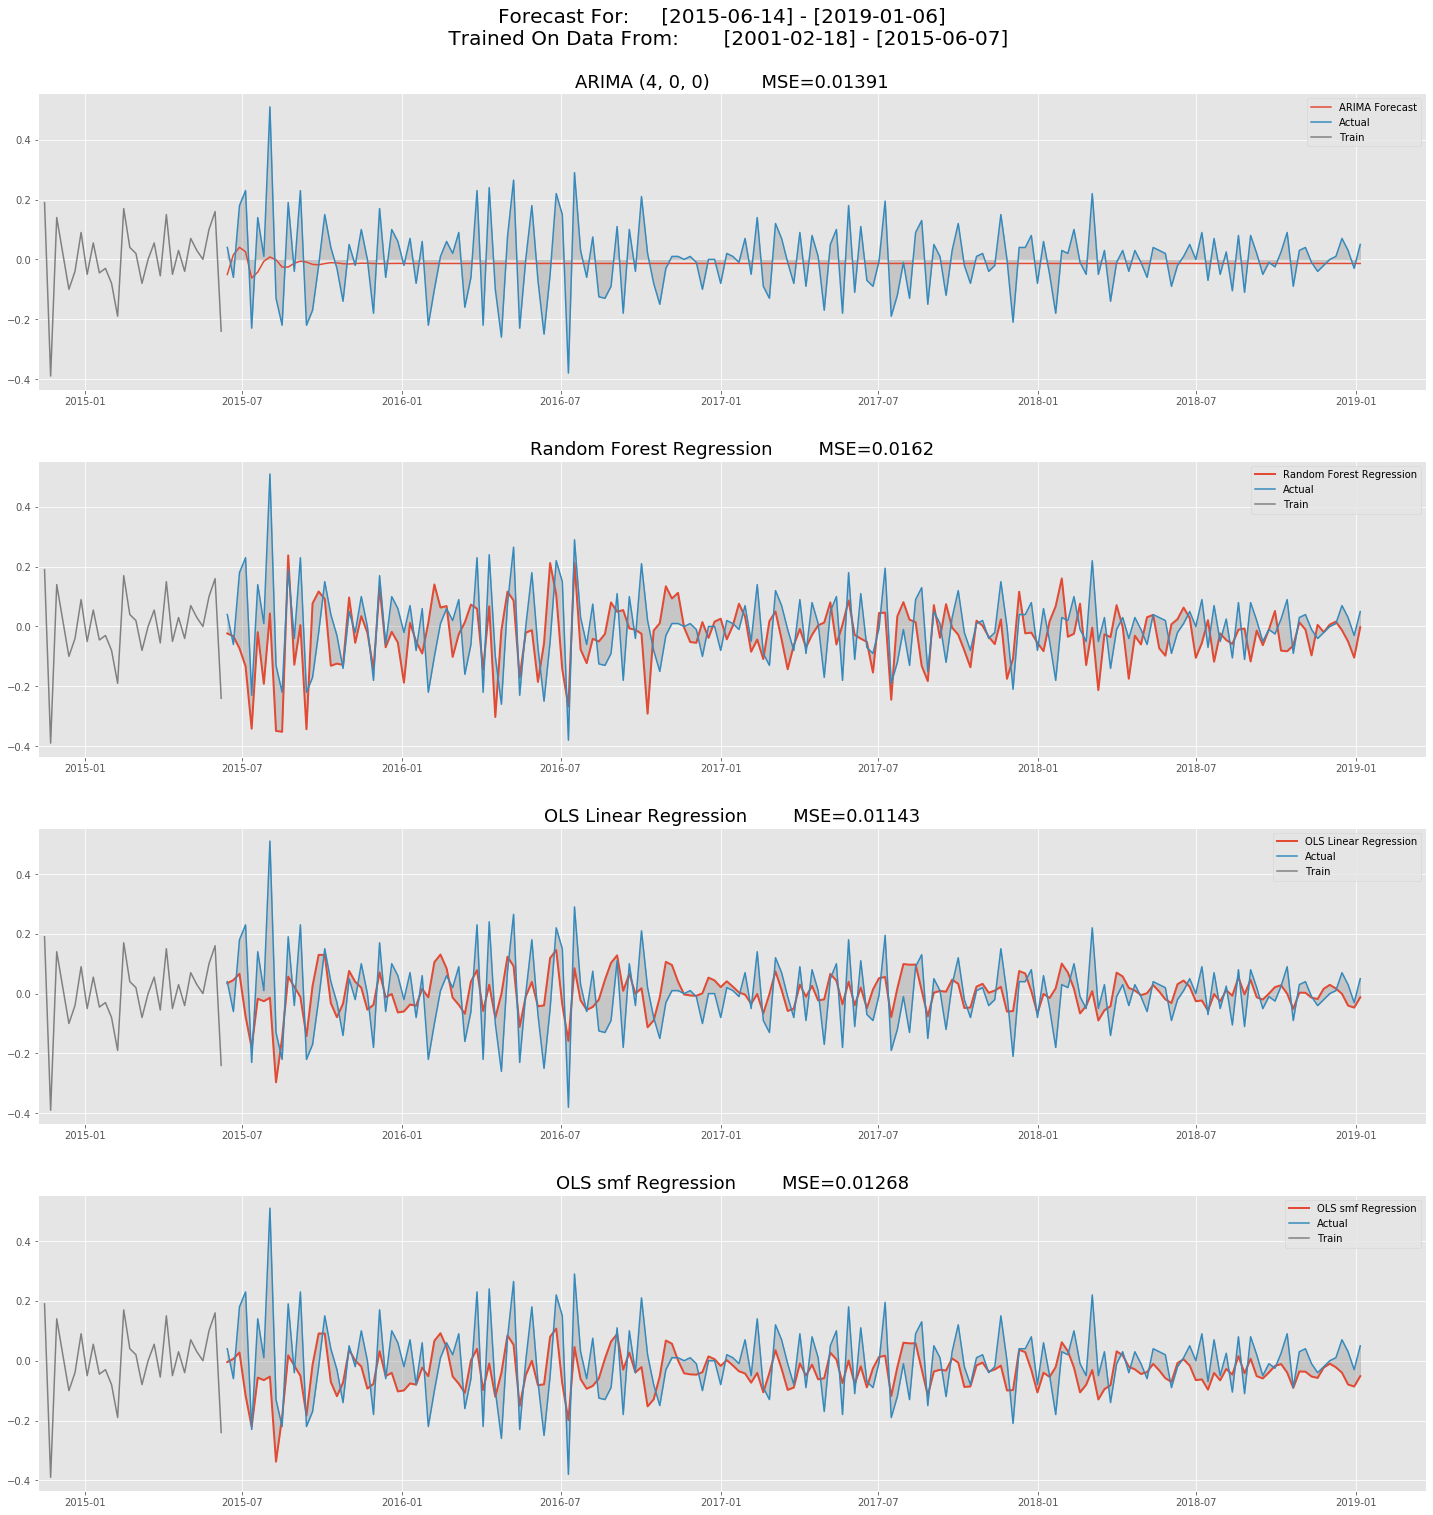

In [143]:
Models(find_order=False).show_models(df)

Auto or Manual?:


 Manual


(3, 1, 1)


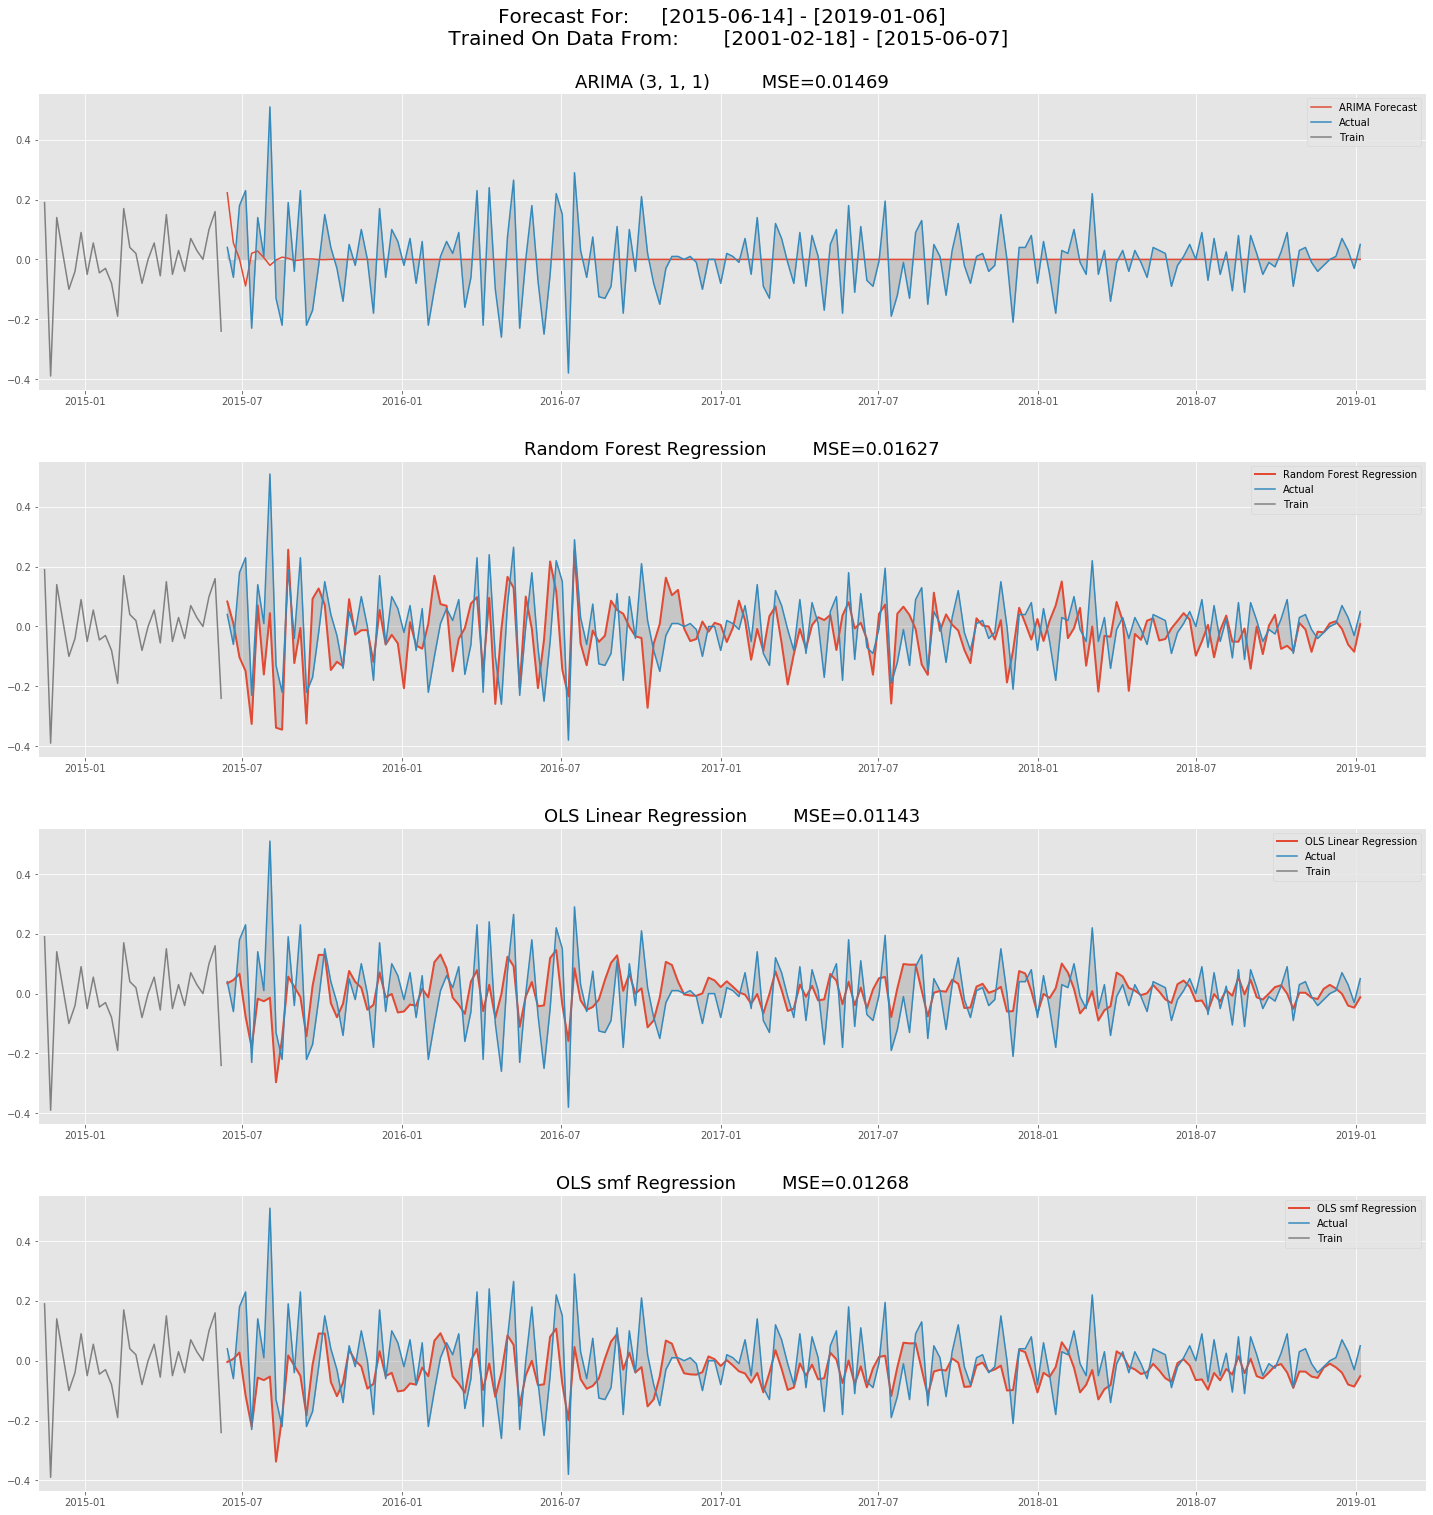

Elapsed time is 1754.842325 seconds.


In [144]:
t.tic()
Models(find_order=True).show_models(df)
t.toc()

In [152]:
%autoreload

Auto or Manual?:


 manual


Please hold


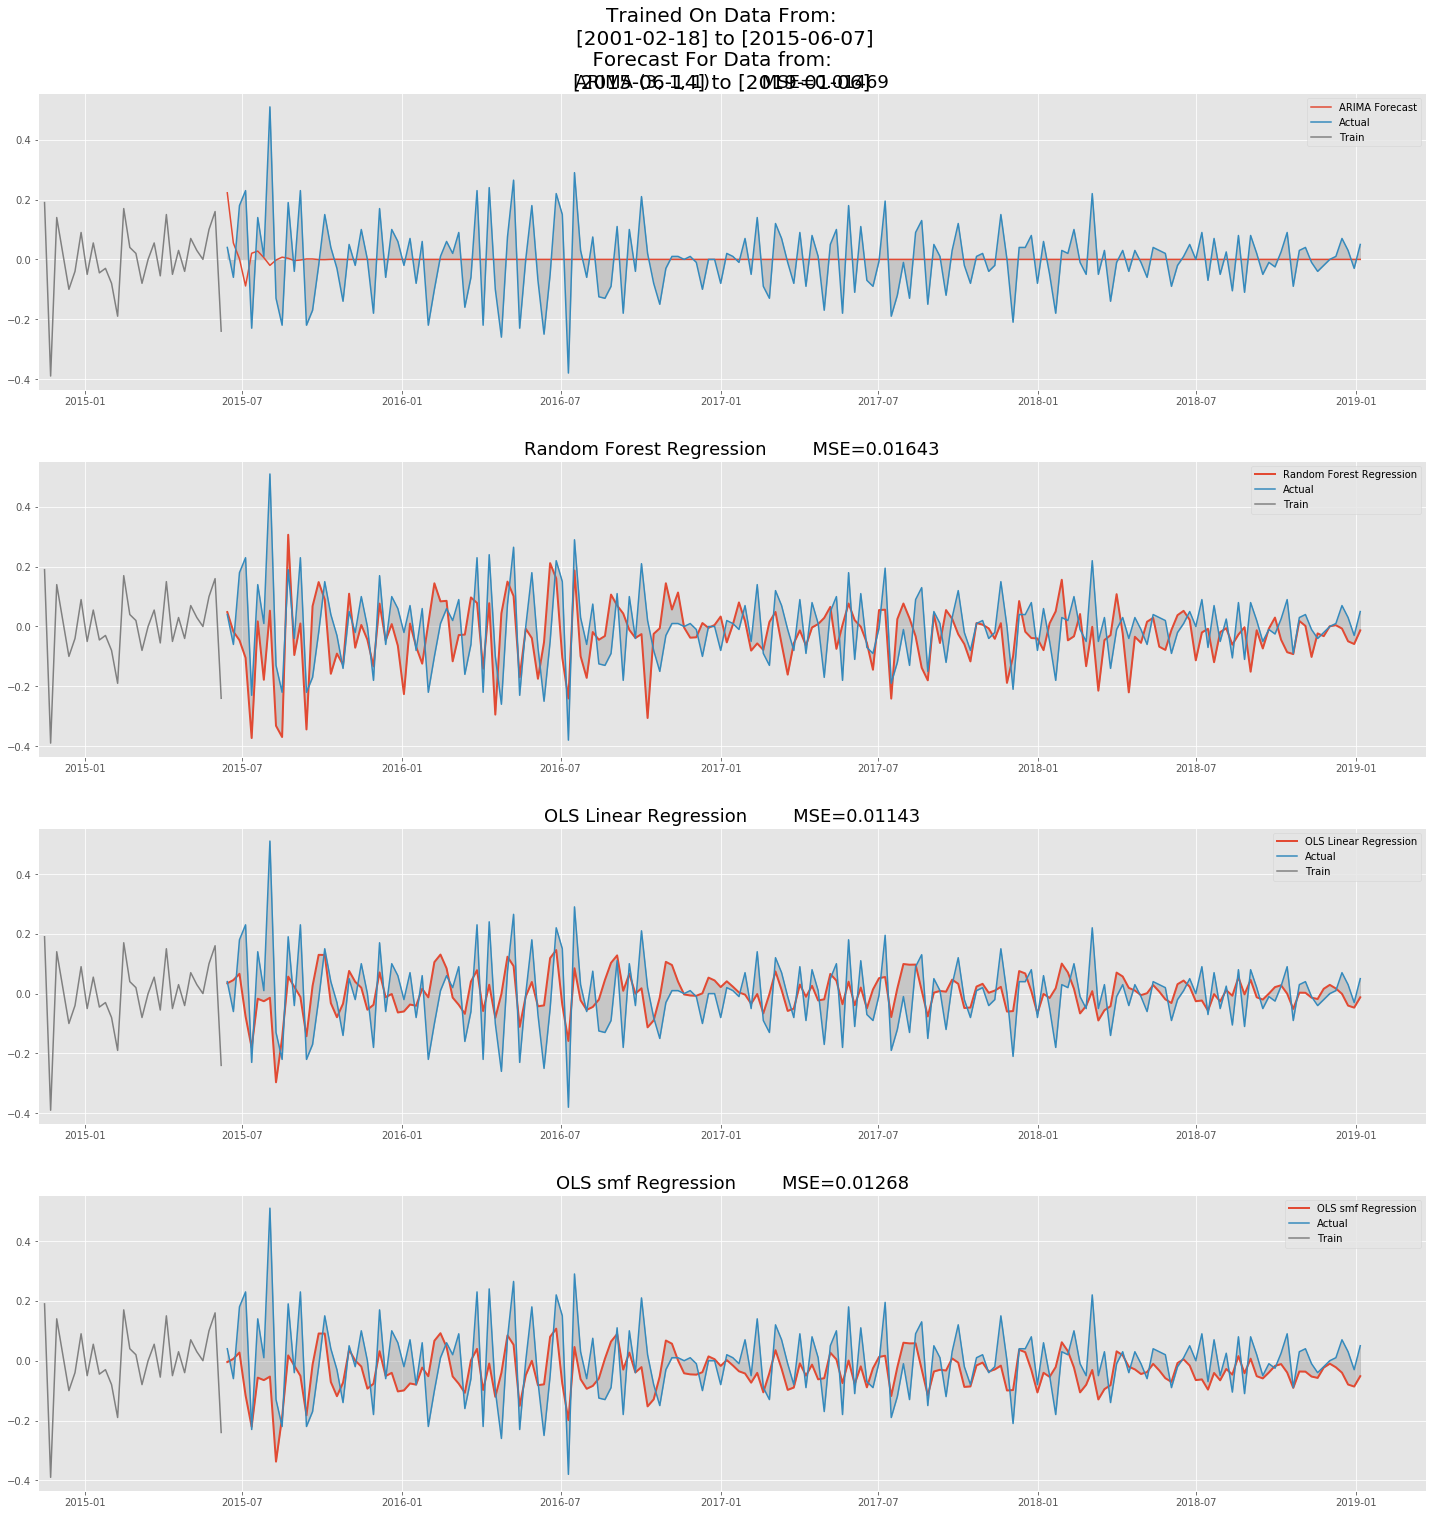

Elapsed time is 1407.190002 seconds.


In [153]:
t.tic()
Models(find_order=True).show_models(df)
t.toc()

Auto or Manual?:


 auto


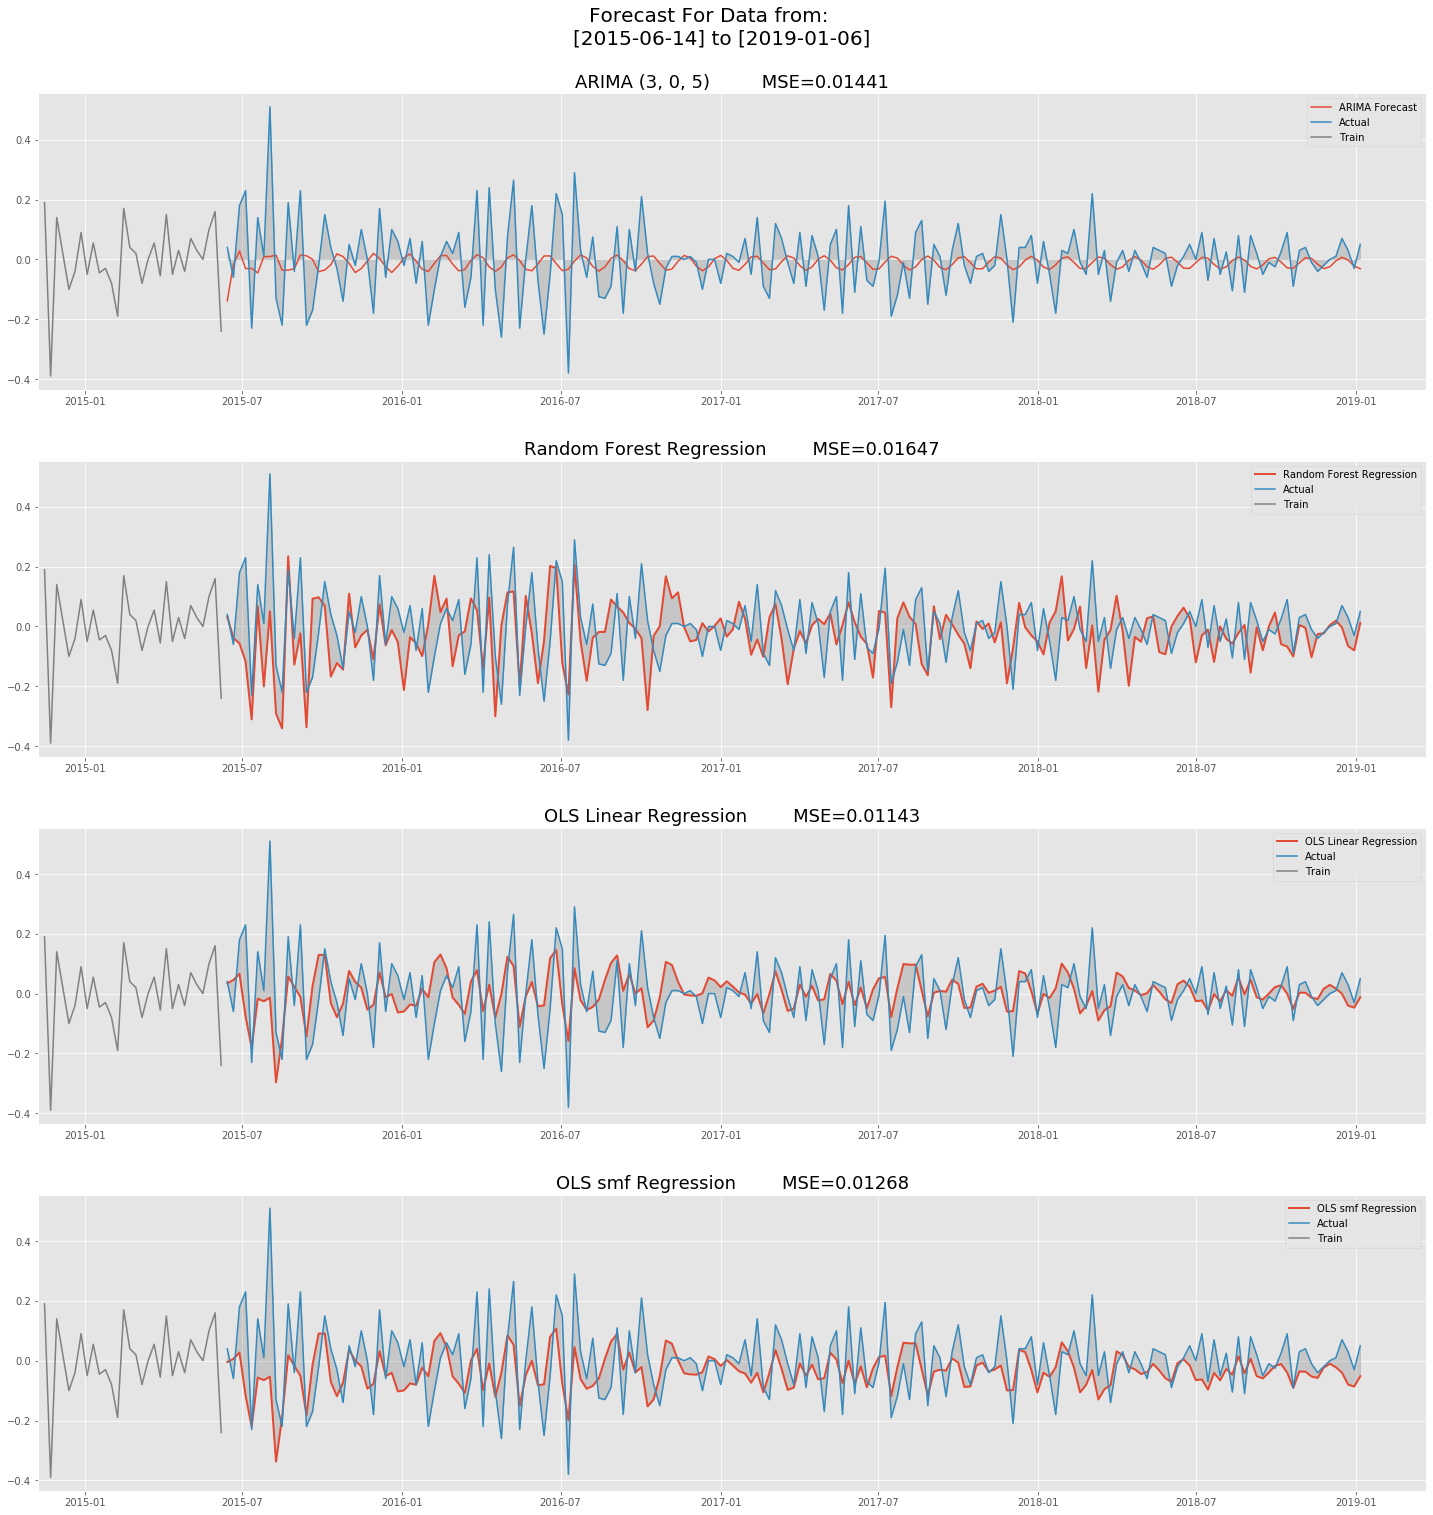

In [159]:
Models(find_order=True).show_models(df)

In [ ]:
arima_mod = Models(find_order=False).ARIMA_predict(df)[0]

In [186]:
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest

NormaltestResult(statistic=1070.0173404730772, pvalue=4.453349149969953e-233)


Text(0.5, 1.0, 'Residual distribution')

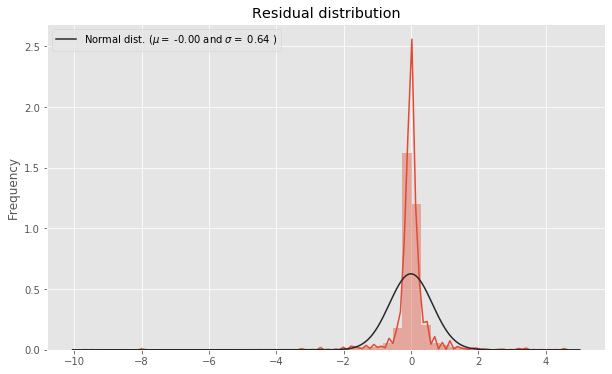

In [186]:
arima_mod = sm.tsa.ARIMA(df, (4,1,1)).fit(disp=False)
resid = arima_mod.resid
print(normaltest(resid))
# returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
# the residual is not a normal distribution

fig = plt.figure()
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')

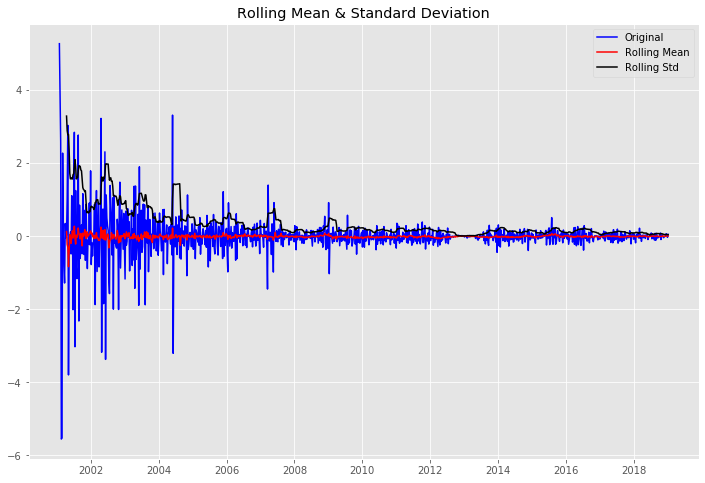

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.086806e+01
p-value                        1.391045e-19
#Lags Used                     1.700000e+01
Number of Observations Used    9.190000e+02
Critical Value (1%)           -3.437486e+00
Critical Value (5%)           -2.864690e+00
Critical Value (10%)          -2.568447e+00
dtype: float64


In [189]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

test_stationarity(df)

AttributeError: 'DataFrame' object has no attribute 'resid'

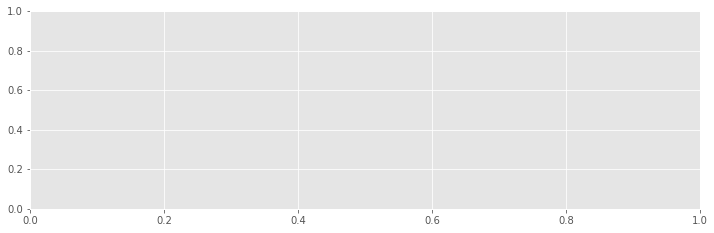

In [188]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.resid, lags=40, ax=ax2)

In [184]:
import plotly as ply
from chart_studio import plotly as ply
from chart_studio.plotly import iplot
import cufflinks as cf

In [187]:
df

,cost_per_watt
installation_date,
2001-01-28,5.270
2001-02-04,3.975
2001-02-11,2.570
2001-02-18,-5.550
2001-02-25,-5.520
...,...
2018-12-09,0.010
2018-12-16,0.070
2018-12-23,0.030


In [201]:
%autoreload

In [196]:
from src.DataScienceTimeSeries import *

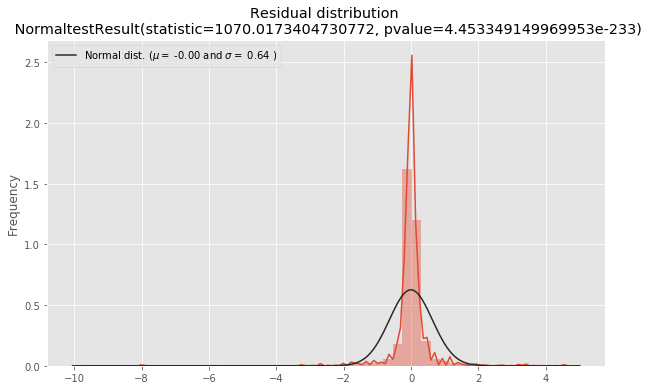

In [199]:
residual_dist(df,(4,1,1))

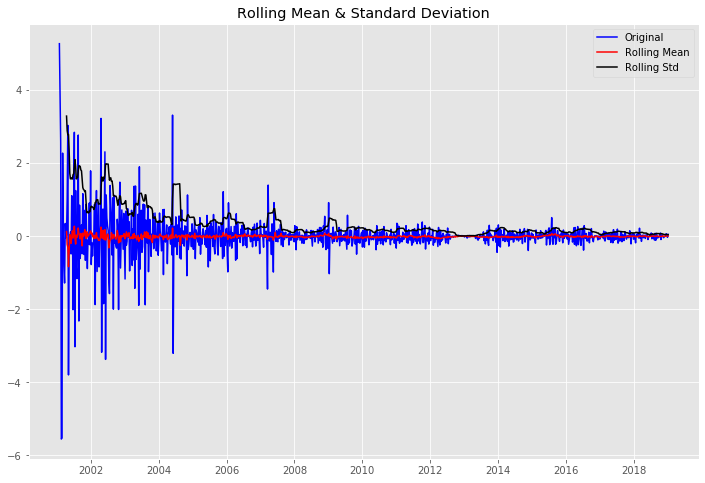

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.


Test Statistic                -1.086806e+01
p-value                        1.391045e-19
#Lags Used                     1.700000e+01
Number of Observations Used    9.190000e+02
Critical Value (1%)           -3.437486e+00
Critical Value (5%)           -2.864690e+00
Critical Value (10%)          -2.568447e+00
dtype: float64

In [202]:
test_stationarity(df)

In [203]:
df

,cost_per_watt
installation_date,
2001-01-28,5.270
2001-02-04,3.975
2001-02-11,2.570
2001-02-18,-5.550
2001-02-25,-5.520
...,...
2018-12-09,0.010
2018-12-16,0.070
2018-12-23,0.030
